In [2]:
!pip install rayoptics

     |████████████████████████████████| 272 kB 1.1 MB/s eta 0:00:01     |████████████████▉               | 143 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 217 kB 3.0 MB/s eta 0:00:01    |███████████████                 | 102 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 76.6 MB 41 kB/s  eta 0:00:01    |█▉                              | 4.5 MB 4.4 MB/s eta 0:00:17     |██▍                             | 5.7 MB 3.5 MB/s eta 0:00:21     |███                             | 7.4 MB 3.5 MB/s eta 0:00:20     |███▏                            | 7.6 MB 1.2 MB/s eta 0:01:00     |███▍                            | 8.0 MB 1.2 MB/s eta 0:01:00     |███▍                            | 8.2 MB 1.2 MB/s eta

https://ray-optics.readthedocs.io/en/latest/examples/TripletExample.html

In [5]:
from rayoptics.environment import *

In [6]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [7]:
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 20.0])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

In [8]:
opm.radius_mode = True

sm.gaps[0].thi=1e10

sm.add_surface([23.713, 4.831, 'N-LAK9', 'Schott'])
sm.add_surface([7331.288, 5.86])
sm.add_surface([-24.456, .975, 'N-SF5', 'Schott'])
sm.set_stop()
sm.add_surface([21.896, 4.822])
sm.add_surface([86.759, 3.127, 'N-LAK9', 'Schott'])
sm.add_surface([-20.4942, 41.2365])

In [9]:
opm.update_model()

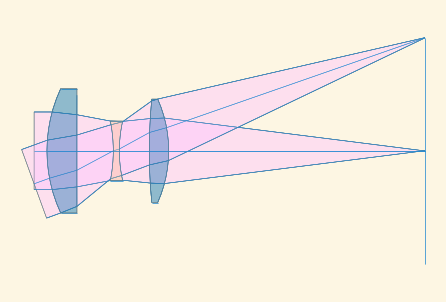

In [10]:
isdark = False
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()

In [11]:
opm.ele_model.list_elements()

0: E1 (Element): Element: Spherical(c=0.042170961076202926), Spherical(c=0.00013640168003221264), t=4.8310, sd=10.0087, glass: N-LAK9
1: AirGap E1-E2 (AirGap): Gap(t=5.86, medium=Air)
2: E2 (Element): Element: Spherical(c=-0.04088976120379457), Spherical(c=0.04567044208987943), t=0.9750, sd=4.7919, glass: N-SF5
3: AirGap E2-E3 (AirGap): Gap(t=4.822, medium=Air)
4: E3 (Element): Element: Spherical(c=0.011526181721781025), Spherical(c=-0.04879429301948844), t=3.1270, sd=8.3321, glass: N-LAK9
5: AirGap E3-Image (AirGap): Gap(t=41.2365, medium=Air)
6: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


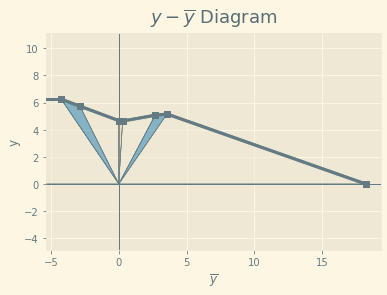

In [12]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht',
                       do_draw_axes=True, do_draw_frame=True, is_dark=isdark).plot()

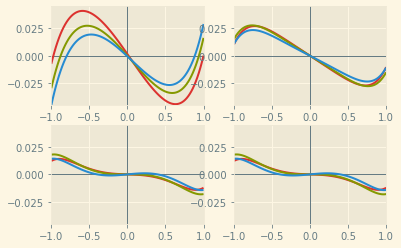

In [13]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()

In [14]:
pm.first_order_data()

efl                  50
ffl               -37.1
pp1                12.9
bfl               41.24
ppk               8.763
f/#                   4
m             2.298e-05
red              -2e+08
obj_dist          1e+10
obj_ang              20
enp_dist          11.68
enp_radius         6.25
na obj         6.25e-10
n obj                 1
img_dist          41.24
img_ht             18.2
exp_dist         -10.01
exp_radius        6.406
na img           -0.124
n img                 1
optical invariant        2.275
